In [1]:
%pip install --upgrade pip
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""Kyrylo Boiko Lab 7"""

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names


In [ ]:
"""Kyrylo Boiko Lab 7"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

kmeans_labels = kmeans.predict(X_scaled)


In [ ]:
"""Kyrylo Boiko Lab 7"""

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_scaled)
    inertia.append(kmeans_model.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
"""Kyrylo Boiko Lab 7"""

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)


gmm_labels = gmm.predict(X_scaled)


kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)


gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)

print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"K-means Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"GMM Silhouette Score: {gmm_silhouette}")
print(f"GMM Davies-Bouldin Index: {gmm_davies_bouldin}")

c:\Users\kyryl\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kyryl\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


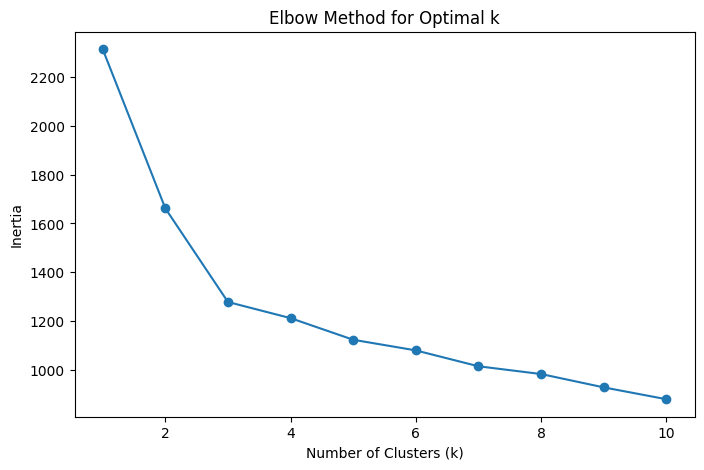

K-means Silhouette Score: 0.2848589191898987
K-means Davies-Bouldin Index: 1.3891879777181646
GMM Silhouette Score: 0.2848589191898987
GMM Davies-Bouldin Index: 1.3891879777181646


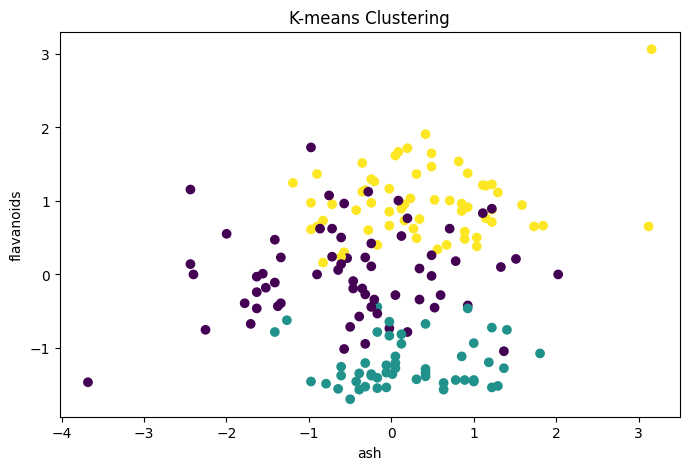

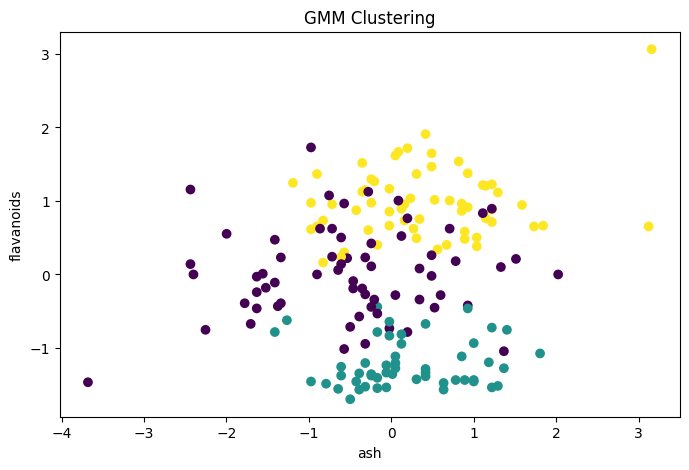

In [ ]:
"""Kyrylo Boiko Lab 7"""

feature_x = 2 
feature_y = 6 


plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, feature_x], X_scaled[:, feature_y], c=kmeans_labels, cmap='viridis', label='K-means Clusters')
plt.title('K-means Clustering')
plt.xlabel(feature_names[feature_x])
plt.ylabel(feature_names[feature_y])
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, feature_x], X_scaled[:, feature_y], c=gmm_labels, cmap='viridis', label='GMM Clusters')
plt.title('GMM Clustering')
plt.xlabel(feature_names[feature_x])
plt.ylabel(feature_names[feature_y])
plt.show()


In [ ]:
"""Kyrylo Boiko Lab 7"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

kmeans_labels = kmeans.predict(X_pca)


In [ ]:
"""Kyrylo Boiko Lab 7"""

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_pca)
    inertia.append(kmeans_model.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA)')
plt.show()


In [ ]:
"""Kyrylo Boiko Lab 7"""

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_pca)

gmm_labels = gmm.predict(X_pca)

kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_pca, kmeans_labels)


gmm_silhouette = silhouette_score(X_pca, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X_pca, gmm_labels)

In [ ]:
"""Kyrylo Boiko Lab 7"""

print(f"K-means Silhouette Score (PCA): {kmeans_silhouette}")
print(f"K-means Davies-Bouldin Index (PCA): {kmeans_davies_bouldin}")
print(f"GMM Silhouette Score (PCA): {gmm_silhouette}")
print(f"GMM Davies-Bouldin Index (PCA): {gmm_davies_bouldin}")


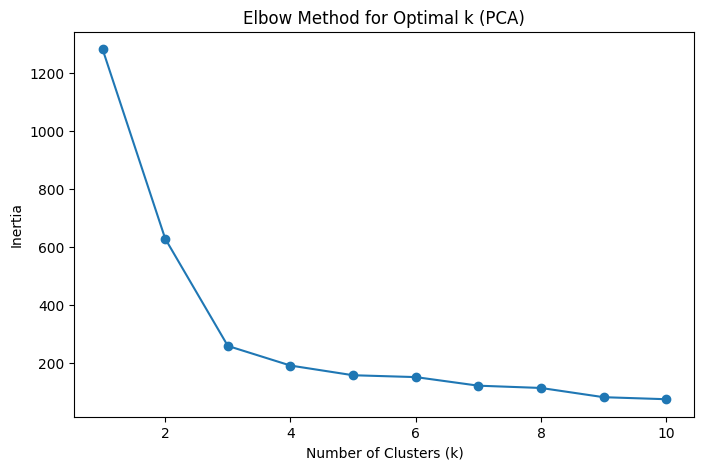

K-means Silhouette Score (PCA): 0.5601697480957202
K-means Davies-Bouldin Index (PCA): 0.5977226208167409
GMM Silhouette Score (PCA): 0.5591116207103001
GMM Davies-Bouldin Index (PCA): 0.6019141028137759


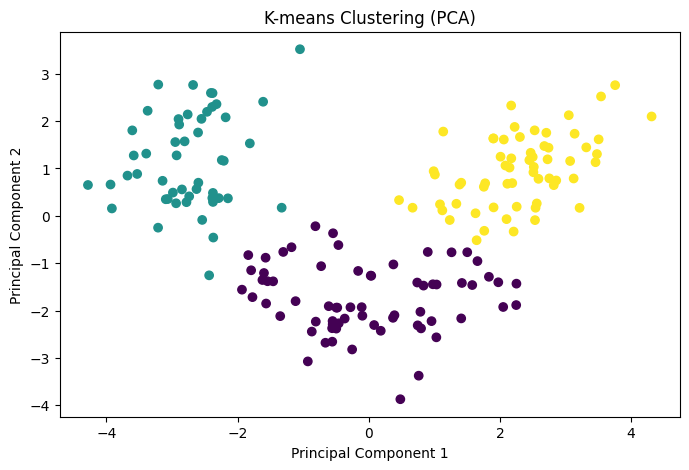

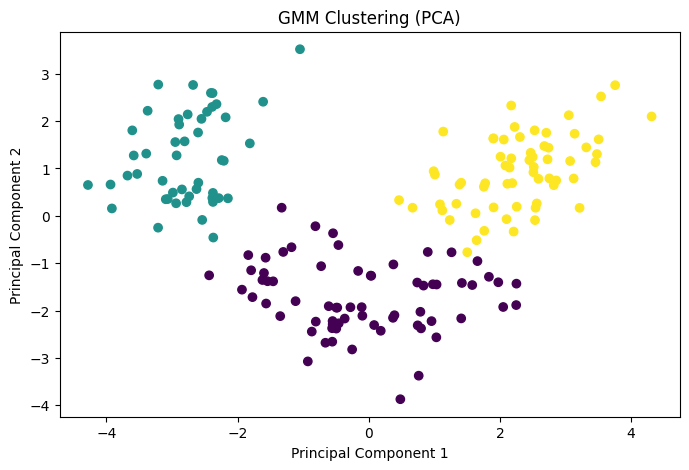

In [ ]:
"""Kyrylo Boiko Lab 7"""

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', label='K-means Clusters')
plt.title('K-means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', label='GMM Clusters')
plt.title('GMM Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
